In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# Preprocess the data

In [14]:
# Load the data but skip the first row
df = pd.read_csv('data/df_Salling_Products.csv' , delimiter=";")
df.head()

,Unnamed: 0,product_id,name,price,link,category
0,0,18381,Bananer,"2,75/Stk.",/produkt/bananer/18381/,frugt-og-groent/
1,1,51061,Peberfrugter røde,"7,25/Stk.",/produkt/peberfrugter-roede/51061/,frugt-og-groent/
2,2,61090,Agurk øko,"9,00/Stk.",/produkt/salling-oeko-agurk-oeko/61090/,frugt-og-groent/
3,3,72008,Bananer 4 pak øko,"2,20/Stk.",/produkt/bananer-4-pak-oeko/72008/,frugt-og-groent/
4,4,18323,Gulerødder,"10,00/Kg.",/produkt/salling-guleroedder/18323/,frugt-og-groent/


In [15]:
# Splitting price into amount and unit
df[['price_amount', 'unit']] = df['price'].str.split('/', expand=True)

# Clean up the 'amount' column, removing any commas and converting to float
df['price_amount'] = df['price_amount'].str.replace(',', '.').str.extract('(\d+.\d+)').astype(float)
df.head()

,Unnamed: 0,product_id,name,price,link,category,price_amount,unit
0,0,18381,Bananer,"2,75/Stk.",/produkt/bananer/18381/,frugt-og-groent/,2.75,Stk.
1,1,51061,Peberfrugter røde,"7,25/Stk.",/produkt/peberfrugter-roede/51061/,frugt-og-groent/,7.25,Stk.
2,2,61090,Agurk øko,"9,00/Stk.",/produkt/salling-oeko-agurk-oeko/61090/,frugt-og-groent/,9.00,Stk.
3,3,72008,Bananer 4 pak øko,"2,20/Stk.",/produkt/bananer-4-pak-oeko/72008/,frugt-og-groent/,2.20,Stk.
4,4,18323,Gulerødder,"10,00/Kg.",/produkt/salling-guleroedder/18323/,frugt-og-groent/,10.00,Kg.


In [16]:
df.describe()

,Unnamed: 0,product_id,price_amount
count,32285.000000,32285.000000,32275.000000
mean,16142.000000,95081.418182,134.526956
std,9320.021057,32105.756833,155.647136
min,0.000000,14287.000000,0.020000
25%,8071.000000,78799.000000,31.950000
50%,16142.000000,102528.000000,85.000000
75%,24213.000000,121124.000000,179.000000
max,32284.000000,133518.000000,999.500000


In [17]:
#remove the / at the end of cells in category column
df['category'] = df['category'].str.replace('/','')
df.head()

,Unnamed: 0,product_id,name,price,link,category,price_amount,unit
0,0,18381,Bananer,"2,75/Stk.",/produkt/bananer/18381/,frugt-og-groent,2.75,Stk.
1,1,51061,Peberfrugter røde,"7,25/Stk.",/produkt/peberfrugter-roede/51061/,frugt-og-groent,7.25,Stk.
2,2,61090,Agurk øko,"9,00/Stk.",/produkt/salling-oeko-agurk-oeko/61090/,frugt-og-groent,9.00,Stk.
3,3,72008,Bananer 4 pak øko,"2,20/Stk.",/produkt/bananer-4-pak-oeko/72008/,frugt-og-groent,2.20,Stk.
4,4,18323,Gulerødder,"10,00/Kg.",/produkt/salling-guleroedder/18323/,frugt-og-groent,10.00,Kg.


In [18]:
#count amount of products in each personlig-pleje category
df['category'].value_counts()

category
personlig-pleje     5741
kolonial            3732
bolig-og-koekken    3500
fritid-og-sport     2793
toej-og-sko         2792
leg                 1991
elektronik          1796
drikkevarer         1700
mejeri-og-koel      1582
slik-og-snacks      1573
husholdning          798
have                 614
broed-og-kager       579
frost                571
dyremad              539
byggemarked          513
baby-og-boern        421
kiosk                375
frugt-og-groent      299
koed-og-fisk         233
biludstyr            143
Name: count, dtype: int64

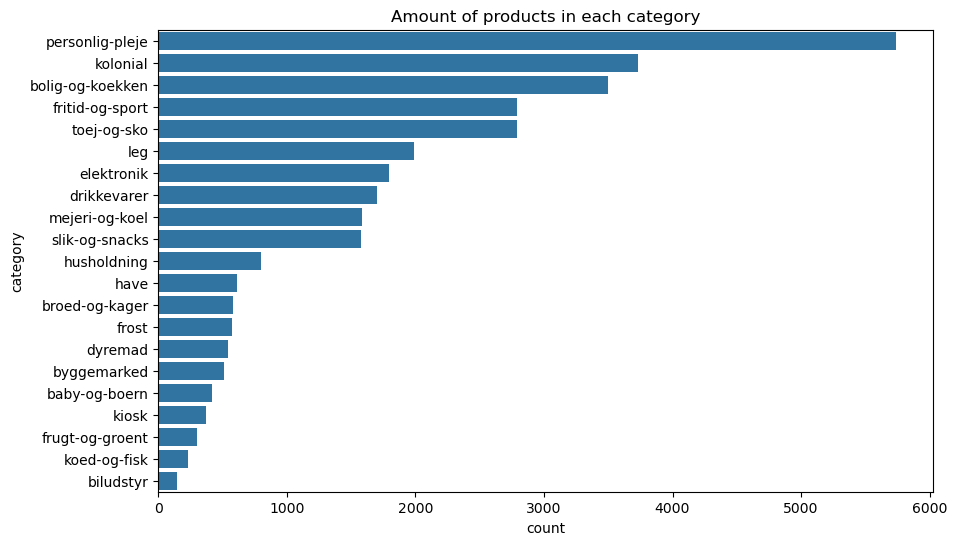

In [19]:
#plot the amount of products in each category on a bar chart y-axis is the product count and x-axis is the category and sort the values
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='category', order = df['category'].value_counts().index)
plt.title('Amount of products in each category')
plt.show()




In [20]:
#count all nan values in the dataframe
df.isnull().sum()

Unnamed: 0       0
product_id       0
name             0
price            0
link             0
category         0
price_amount    10
unit            16
dtype: int64

In [21]:
df.shape    

(32285, 8)

In [22]:
#print all unique values in the category column
df['category'].value_counts()

category
personlig-pleje     5741
kolonial            3732
bolig-og-koekken    3500
fritid-og-sport     2793
toej-og-sko         2792
leg                 1991
elektronik          1796
drikkevarer         1700
mejeri-og-koel      1582
slik-og-snacks      1573
husholdning          798
have                 614
broed-og-kager       579
frost                571
dyremad              539
byggemarked          513
baby-og-boern        421
kiosk                375
frugt-og-groent      299
koed-og-fisk         233
biludstyr            143
Name: count, dtype: int64

In [23]:

foods = ['frugt-og-groent', 'koed-og-fisk', 'mejeri-og-koel', 'drikkevarer', 'broed-og-kager','kolonial', 'slik-og-snacks', 'frost','kiosk']
house = ['husholdning', 'personlig-pleje', 'baby-og-boern', 'bolig-og-koekken', 'fritid-og-sport', 'toej-og-sko', 'have', 'leg', 'byggemarked']
other = ['dyremad','elektronik','biludstyr']

# Map categories to main groups
df['outer_category'] = df['category'].map(lambda x: 'Foods' if x in foods else ('House' if x in house else 'Other'))

df.head()


,Unnamed: 0,product_id,name,price,link,category,price_amount,unit,outer_category
0,0,18381,Bananer,"2,75/Stk.",/produkt/bananer/18381/,frugt-og-groent,2.75,Stk.,Foods
1,1,51061,Peberfrugter røde,"7,25/Stk.",/produkt/peberfrugter-roede/51061/,frugt-og-groent,7.25,Stk.,Foods
2,2,61090,Agurk øko,"9,00/Stk.",/produkt/salling-oeko-agurk-oeko/61090/,frugt-og-groent,9.00,Stk.,Foods
3,3,72008,Bananer 4 pak øko,"2,20/Stk.",/produkt/bananer-4-pak-oeko/72008/,frugt-og-groent,2.20,Stk.,Foods
4,4,18323,Gulerødder,"10,00/Kg.",/produkt/salling-guleroedder/18323/,frugt-og-groent,10.00,Kg.,Foods


In [24]:
#count the amount of products in each main category
df['outer_category'].value_counts()

outer_category
House    19163
Foods    10644
Other     2478
Name: count, dtype: int64

In [25]:
#save df as csv
#df.to_csv('data/df_Salling_Products_outer_categories.csv', index=False, sep=';')

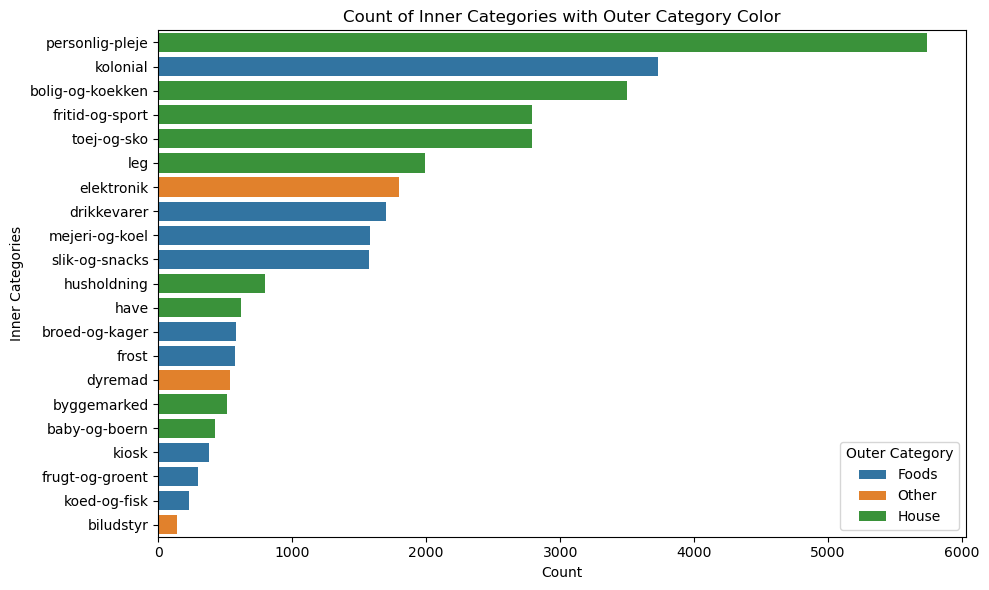

In [26]:

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df, hue='outer_category', order=df['category'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Inner Categories')
plt.title('Count of Inner Categories with Outer Category Color')
plt.legend(title='Outer Category')
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

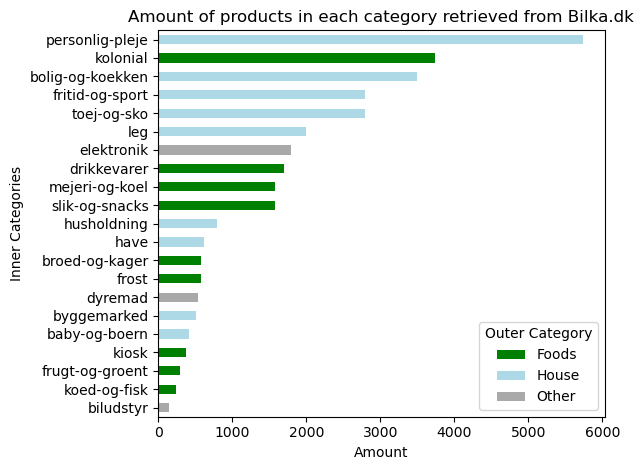

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have imported your data into 'df' DataFrame
# Assuming 'outer_category' column contains the outer category information

# Define three specific colors for the outer categories
colors = ['green', 'lightblue', 'darkgray']  # You can customize these colors as needed

# Grouping by both inner and outer categories and counting occurrences
category_counts = df.groupby(['category', 'outer_category']).size().unstack()

# Summing the counts across outer categories to get total counts for each inner category
category_totals = category_counts.sum(axis=1)

# Sorting the inner categories by total counts
category_totals_sorted = category_totals.sort_values(ascending=True)

# Reordering the category_counts DataFrame based on the sorted inner categories
category_counts_sorted = category_counts.loc[category_totals_sorted.index]

# Plotting
plt.figure(figsize=(10, 8),facecolor='none')
category_counts_sorted.plot(kind='barh', stacked=True, color=colors)
plt.xlabel('Amount')
plt.ylabel('Inner Categories')
plt.title('Amount of products in each category retrieved from Bilka.dk')
plt.tight_layout()
plt.legend(title='Outer Category')

plt.show()


# Text data

In [28]:

# Load the data but skip the first row

df_text = pd.read_csv('data/df_Salling_Products_Descriptions.csv' , delimiter=";")
#rename the column name to match the other dataframe
df_text = df_text.rename(columns = {'p_id':'product_id'})
df_text.head()

,product_id,descriptions
0,18381,"Bananer har en anelse syrlig, mild og sød sma..."
1,51061,Peberfrugter har en sød og syrlig smag med hi...
2,61090,"Agurker smager mildt, sødt, en anelse syrligt..."
3,72008,"Bananer har en anelse syrlig, mild og sød sma..."
4,18323,"Gulerødder har en sød, frugtig, mild og en an..."


In [29]:
# Merge the two dataframes on the 'product_id' column
df_merged = pd.merge(df, df_text, on='product_id', how='outer')
df_merged.head()

,Unnamed: 0,product_id,name,price,link,category,price_amount,unit,outer_category,descriptions
0,11164,14287,Urtehø,"83,90/Kg.",/produkt/best-friend-festival-urtehoe/14287/,dyremad,83.90,Kg.,Other,500 gHerbal Hay fra Best Friend er en velsmag...
1,11011,14289,Drikkeflaske,"48,95/Stk.",/produkt/best-friend-festival-drikkeflaske/14289/,dyremad,48.95,Stk.,Other,500 mlDrypfri med dobbelt ventilDrypfri drikk...
2,10673,14290,Fuglebolde,"17,76/Kg.",/produkt/nature-for-all-seasons-fuglebolde/14290/,dyremad,17.76,Kg.,Other,2250 gFuglebolde uden net fra Nature for all ...
3,10867,14293,Hirsekolber,"143,17/Kg.",/produkt/best-friend-festival-hirsekolber/14293/,dyremad,143.17,Kg.,Other,"300 g, Lækkerbisken til burfugleHirsekolber e..."
4,10738,14294,Vildtfuglefoder m. blandede frø,"18,48/Kg.",/produkt/nature-vildtfuglefoder-m-blandede-fro...,dyremad,18.48,Kg.,Other,2 kgFlere af fuglenes foretrukne frøNature fo...


In [30]:
#specify the categories where there is no description available
no_description = df_merged[df_merged['descriptions'].isnull()]['category'].value_counts()
no_description

Series([], Name: count, dtype: int64)

In [31]:
#count the length of the description for each product by words
df_merged['description_length'] = df_merged['descriptions'].str.split().str.len()

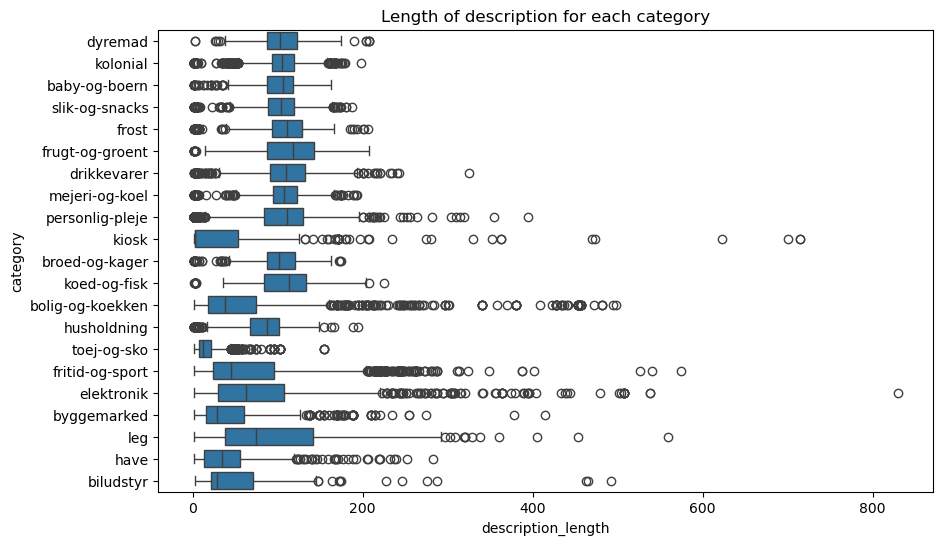

In [32]:
#count the length of the description for each product
df_merged['description_length'] = df_merged['descriptions'].str.split().str.len()#.str.len()

#plot the length of the description for each category
plt.figure(figsize=(10,6))
sns.boxplot(data=df_merged, y='category', x='description_length')
plt.title('Length of description for each category')
plt.show()


In [33]:
df_merged.head()

,Unnamed: 0,product_id,name,price,link,category,price_amount,unit,outer_category,descriptions,description_length
0,11164,14287,Urtehø,"83,90/Kg.",/produkt/best-friend-festival-urtehoe/14287/,dyremad,83.90,Kg.,Other,500 gHerbal Hay fra Best Friend er en velsmag...,66
1,11011,14289,Drikkeflaske,"48,95/Stk.",/produkt/best-friend-festival-drikkeflaske/14289/,dyremad,48.95,Stk.,Other,500 mlDrypfri med dobbelt ventilDrypfri drikk...,70
2,10673,14290,Fuglebolde,"17,76/Kg.",/produkt/nature-for-all-seasons-fuglebolde/14290/,dyremad,17.76,Kg.,Other,2250 gFuglebolde uden net fra Nature for all ...,52
3,10867,14293,Hirsekolber,"143,17/Kg.",/produkt/best-friend-festival-hirsekolber/14293/,dyremad,143.17,Kg.,Other,"300 g, Lækkerbisken til burfugleHirsekolber e...",107
4,10738,14294,Vildtfuglefoder m. blandede frø,"18,48/Kg.",/produkt/nature-vildtfuglefoder-m-blandede-fro...,dyremad,18.48,Kg.,Other,2 kgFlere af fuglenes foretrukne frøNature fo...,159


In [34]:
#get the row with the longest description
longest_description = df_merged.loc[df_merged['description_length'].idxmax()]
longest_description

Unnamed: 0                                                        29022
product_id                                                       102857
name                  GOOGLE NEST AUDIO smarthøjttaler med stemmesty...
price                                                       699,00/Stk.
link                  /produkt/google-google-nest-audio-smarthoejtta...
category                                                     elektronik
price_amount                                                      699.0
unit                                                               Stk.
outer_category                                                    Other
descriptions           FÅS I FARVERNE CHALK ELLER CHARCOAL. Fantasti...
description_length                                                  830
Name: 16221, dtype: object

In [121]:
df_outercats = pd.read_csv('data/df_Salling_Products_outer_categories.csv', delimiter=";")
df_outercats = df_outercats.drop(columns=['Unnamed: 0'])
df_neighbours = pd.read_csv('data/df_Salling_Products_Neighbours.csv', delimiter=";")
df_description = pd.read_csv('data/df_Salling_Products_Descriptions.csv', delimiter=";")


df1 = pd.merge(df_outercats, df_neighbours, on='product_id', how='inner')
df1 = pd.merge(df1, df_description, on='product_id', how='inner')

In [122]:
import ast

def convert_string_to_list(string_list):
    return ast.literal_eval(string_list) 

df1['neighbor_products_id'] = df1['neighbor_products_id'].apply(convert_string_to_list)

In [125]:
df = df1[df1['neighbor_products_id'].apply(lambda x: len(x) > 0)]
df = df[df['descriptions'].apply(lambda x: x != "No description available")]

In [128]:
df.to_csv('data/df_Salling_Products_Cleaned.csv', index=False, sep=';')

In [ ]:
#count the length of the description for each product by words
df_merged['description_length'] = df_merged['descriptions'].str.split().str.len()

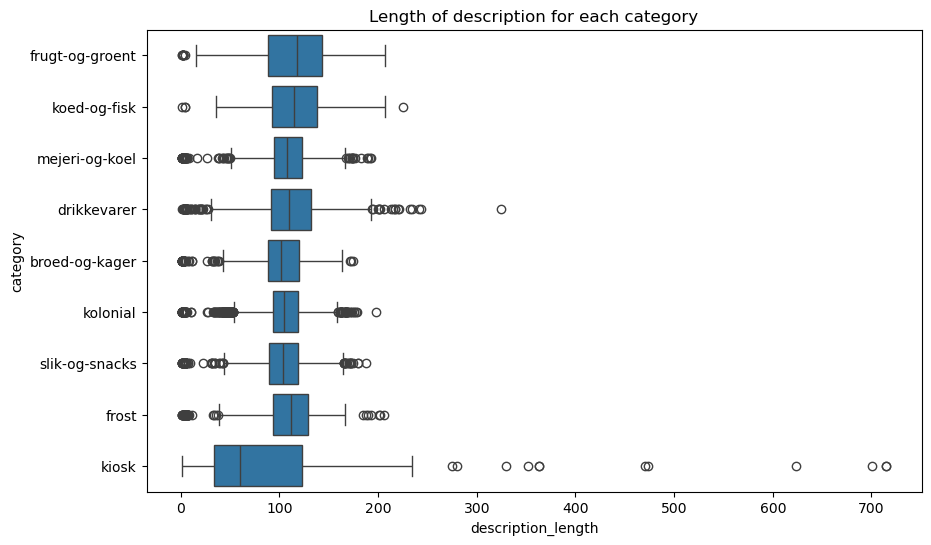

In [133]:
#count the length of the description for each product
df['description_length'] = df['descriptions'].str.split().str.len()#.str.len()

#plot the length of the description for each category
plt.figure(figsize=(10,6))
sns.boxplot(data=df, y='category', x='description_length')
plt.title('Length of description for each category')
plt.show()


In [145]:
df_descrip_threshold = df.loc[df['description_length'] >= 30]

In [147]:
df_descrip_threshold = df_descrip_threshold.reset_index()

In [148]:
df_descrip_threshold

,index,product_id,name,price,link,category,price_amount,unit,outer_category,neighbor_products_id,descriptions,description_length
0,0,18381,Bananer,"2,75/Stk.",/produkt/bananer/18381/,frugt-og-groent,2.75,Stk.,Foods,"[18379, 18364, 50998, 51061, 53365, 84121, 197...","Bananer har en anelse syrlig, mild og sød sma...",89
1,1,51061,Peberfrugter røde,"7,25/Stk.",/produkt/peberfrugter-roede/51061/,frugt-og-groent,7.25,Stk.,Foods,"[18364, 53365, 116664, 18381, 29439, 61090, 18...",Peberfrugter har en sød og syrlig smag med hi...,88
2,2,61090,Agurk øko,"9,00/Stk.",/produkt/salling-oeko-agurk-oeko/61090/,frugt-og-groent,9.00,Stk.,Foods,"[72008, 19687, 37982, 39411, 51061, 41388, 116...","Agurker smager mildt, sødt, en anelse syrligt...",142
3,3,72008,Bananer 4 pak øko,"2,20/Stk.",/produkt/bananer-4-pak-oeko/72008/,frugt-og-groent,2.20,Stk.,Foods,"[61090, 19687, 53365, 39411, 18364, 29439, 404...","Bananer har en anelse syrlig, mild og sød sma...",89
4,4,18323,Gulerødder,"10,00/Kg.",/produkt/salling-guleroedder/18323/,frugt-og-groent,10.00,Kg.,Foods,"[18364, 51061, 29439, 18381, 53365, 85465, 841...","Gulerødder har en sød, frugtig, mild og en an...",144
...,...,...,...,...,...,...,...,...,...,...,...,...
10075,10587,20471,Smertestillende tabletter 150 mg,"2,80/Stk.",/produkt/kodimagnyl-smertestillende-tabletter-...,kiosk,2.80,Stk.,Foods,"[16154, 22274, 85285, 104708, 104707, 84739, 1...",Produktinformation : Kodimagnyl Ikke-stoppe...,623
10076,10588,20435,Smertestillende gel,"90,00/Stk.",/produkt/voltaren-smertestillende-gel/20435/,kiosk,90.00,Stk.,Foods,"[113416, 20474, 33321, 51023, 71123, 81420, 20...","Voltaren gel 11,6 mg/gDiclofenacdiethylaminBe...",107
10077,10589,20409,Nikotinsugetabletter Mint sukkerfri,"1,65/Stk.",/produkt/nicotinell-nikotinsugetabletter-mint-...,kiosk,1.65,Stk.,Foods,"[20414, 121090, 40779, 20807, 41800, 19721, 84...",Nicotinell Mint 1 mg sugetabletter NikotinTil...,104
10078,10590,20443,Allergikapsler 8 mg,"2,62/Stk.",/produkt/benadryl-allergikapsler-8-mg/20443/,kiosk,2.62,Stk.,Foods,"[118326, 51061, 115287, 56398, 86733, 52611, 1...",BenadrylAcrivastinLindrer symptomer på allerg...,78


In [149]:
df_descrip_threshold = df_descrip_threshold.loc[df_descrip_threshold['category'] != 'kiosk']

In [151]:
df_descrip_threshold.to_csv('data/df_Salling_Products_Cleaned_filtered.csv', index=False, sep=';')